In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\alexa\OneDrive\Documents\data analytics\Achievement 4\01-09-2022 Instacart Basket Analysis'

In [3]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_busy_frequencies.pkl'))

In [4]:
df_ords_prods_merge.head()

,order_id,user_id,order_number,Order_day_of_week,order_hour_of_day,Days since last order,New customer,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest day,2 busy/slow days,busiest_period_of_day,max order,loyalty_flag,Mean_price,Spend_flag,Median_since_last_ordered,Order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Mid range products,Regular busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Mid range products,Regular busy,Two slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Mid range products,Regular busy,Two slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Mid range products,Least busy,Two slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Mid range products,Least busy,Two slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust


<AxesSubplot:>

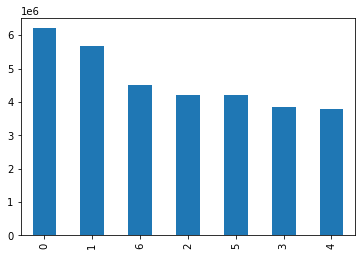

In [6]:
df_ords_prods_merge['Order_day_of_week'].value_counts().plot.bar()

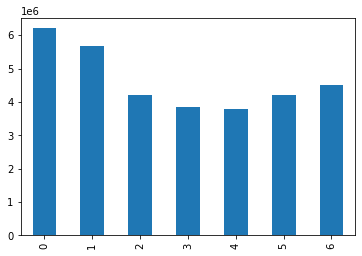

In [7]:
bar = df_ords_prods_merge['Order_day_of_week'].value_counts().sort_index().plot.bar()

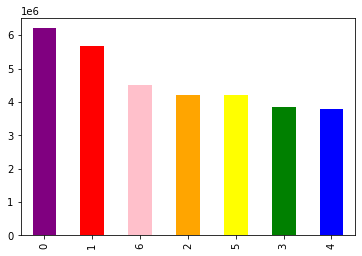

In [8]:
bar = df_ords_prods_merge['Order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

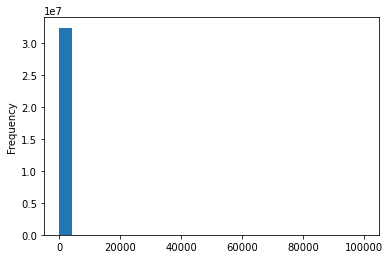

In [10]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [12]:
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
df_ords_prods_merge['prices'].mean()

11.980225638467232

In [14]:
df_ords_prods_merge['prices'].max()

99999.0

In [15]:
df_ords_prods_merge['prices'].min()

1.0

In [16]:
df_ords_prods_merge['prices'].median()

7.4

<AxesSubplot:xlabel='prices', ylabel='prices'>

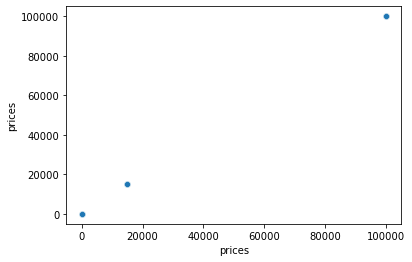

In [18]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [20]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices']> 100]

,order_id,user_id,order_number,Order_day_of_week,order_hour_of_day,Days since last order,New customer,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest day,2 busy/slow days,busiest_period_of_day,max order,loyalty_flag,Mean_price,Spend_flag,Median_since_last_ordered,Order_frequency_flag
10030345,912404,17,12,2,14,5.0,False,21553.0,5.0,0.0,...,High-range products,Regular busy,Regular busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent cust
10030346,603376,17,22,6,16,4.0,False,21553.0,3.0,1.0,...,High-range products,Regular busy,Regular busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent cust
10030347,3264360,135,2,2,21,13.0,False,21553.0,6.0,0.0,...,High-range products,Regular busy,Regular busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular cust
10030348,892534,135,3,0,8,12.0,False,21553.0,3.0,1.0,...,High-range products,Busiest day,Two busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular cust
10030349,229704,342,8,1,19,30.0,False,21553.0,9.0,0.0,...,High-range products,Regular busy,Two busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent cust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664.0,1.0,0.0,...,High-range products,Busiest day,Two busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent cust
29166210,2363282,204099,31,0,9,2.0,False,33664.0,1.0,1.0,...,High-range products,Busiest day,Two busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent cust
29166211,3181945,204395,13,3,15,8.0,False,33664.0,25.0,0.0,...,High-range products,Regular busy,Two slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent cust
29166212,2486215,205227,7,3,20,4.0,False,33664.0,8.0,0.0,...,High-range products,Regular busy,Two slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular cust


In [21]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
df_ords_prods_merge['prices'].max()

25.0

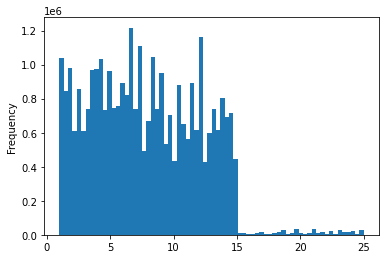

In [24]:
hist_2 = df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [26]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_dow.png'))

In [27]:
df = df_ords_prods_merge[:2000000]

In [28]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [29]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [30]:
big = df_ords_prods_merge[dev]
small = df_ords_prods_merge[~dev]

In [31]:
len(df_ords_prods_merge)

32404859

In [32]:
len(big) + len(small)

32404859

In [33]:
df_2 = small[['Order_day_of_week', 'prices']]

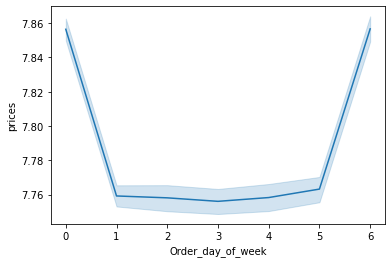

In [34]:
line = sns.lineplot(data = df_2, x = 'Order_day_of_week', y = 'prices')